# Assignment 5

In [ ]:
import copy
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

import scipy.linalg
import scipy.signal
from scipy.integrate import odeint

import ipywidgets as widgets 
from IPython.display import display, HTML, Math

from sympy import Matrix, latex, init_printing
init_printing()

# try:
#   import control
# except ModuleNotFoundError:
#   print("Could not find control - installing")
#   !pip install control # takes 20 sec
#   !pip install slycot # takes 2-3 min
# import control

float_formatter = "{:.6f}".format
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})
np.set_printoptions(precision=6)
plt.rcParams["font.serif"] = "cmr12"
plt.rcParams["figure.dpi"] = 150

## Solution 1 <font color='red' size=3>[10 points total]</font>

Using dynamic programming yields the minimum-time path shown
below.  The associated minimum time is 18.  Since this graph has
no negative length cycles, by the Principal of Optimality, dynamic
programming is guaranteed to yield the optimal answer.

The "forward greedy" approach yields a cost of 19.

<div align="center">
  <img src="http://drive.google.com/uc?export=view&id=1pT6JAJyM3V-HT5uOe1UDZpiozSFE6oFn" alt="problem description" width="60%" />
</div>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| missing/incorrect DP solution              | -5                                       |
| missing/incorrect forward greedy cost  | -5                                       |

<!-- Using dynamic programming yields the minimum-time path shown
below.  The associated minimum time is 11.  Since this graph has
no negative length cycles, by the Principal of Optimality, dynamic
programming is guaranteed to yield the optimal answer. 

Regarding
the greedy solutions, there are three different valid greedy paths
depending on how to tie-break. The travel times for those
solutions are 12, 16, and 19.

<div align="center">
  <img src="http://drive.google.com/uc?export=view&id=158nzSwsZOilPoQYH3MKHazIG-ouF4PQ8" alt="problem description" width="60%" />
</div> -->

$
\renewcommand{\jmatc}[4]{\left[ \ba{cc} #1 & #2 \\[.5em] #3 & #4 \ea
\right]}
\newcommand{\jmatr}[4]{\left[ \ba{rr} #1 & #2 \\[.5em] #3 & #4 \ea
\right]}
\newcommand{\jmthr}[9]{\left[ \ba{rrr} #1 & #2 & #3 \\
#4 & #5 & #6 \\ #7 & #8 & #9\ea \right]}
\newcommand{\jvthr}[3]{\left[ \ba{r} #1 \\ #2 \\ #3\ea \right]}
\newcommand{\jhthr}[3]{\left[ \ba{rrr} #1 & #2 & #3\ea \right]}
\newcommand{\jvechc}[2]{\left[ \ba{cc} #1 & #2 \ea \right]}
\newcommand{\jcolc}[2]{\left[ \ba{c} #1 \\ #2 \ea \right]}
\newcommand{\jvecvc}[2]{\left[ \ba{c} #1 \\ #2 \ea \right]}
\newcommand{\bmat}{\begin{bmatrix}}
\newcommand{\emat}{\end{bmatrix}}
\newcommand{\expect}[1]{\expec\left[ #1 \right]}
\newcommand{\mb}{\mathbf}
\newcommand{\argmax}{\operatornamewithlimits{argmax}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\ba}{\begin{array}}
\newcommand{\ea}{\end{array}}
\newcommand{\njbv}{\mathbf{v}}
\newcommand{\njbw}{\mathbf{w}}
\newcommand{\njbx}{\mathbf{x}}
\newcommand{\njby}{\mathbf{y}}
$
$
\newcommand{\rxx}{R_{xx}}
\newcommand{\ruu}{R_{uu}}
$

## Solution 2 <font color='red' size=3>[10 points total]</font>

For this tracking problem we want $y(t) = r(t)$ as $t \rightarrow \infty$.

1. The naive implementation $u=r-Kx$ gives the following closed-loop system,
\begin{eqnarray}
\dot x &=& (A-BK)x + B r \\
y &=& C x
\end{eqnarray}
with LQR gains (e.g., from MATLAB `lqr` or Python [`control.lqr`](https://python-control.readthedocs.io/en/0.8.3/generated/control.lqr.html)) of $K=\left[\!\begin{array}{c c} 
15.3193 & 52.0217 \end{array} \!\right]$.  The transfer function 
from $r$ to $y$ becomes, 
$$
G(s) = \frac{y(s)}{r(s)} = \frac{s-2}{s^2+12.32s+22.38}
$$
So we can expect that the steady-state value of $y$, denoted as 
$y_{ss}$, with respect to a unit step $r$ will be,
$$
y_{ss} = -\frac{2}{22.38} = -0.089
$$
This can be seen in the figure below.  Therefore, $u=r-Kx$ is a very 
bad choice for a tracking controller, even for a unit step reference 
trajectory.

2. An alternate controller using $u=Nr-Kx$ results in the 
following closed-loop system,
\begin{eqnarray}
\dot x &=& (A-BK)x + B N r \\
y &=& C x
\end{eqnarray}
So the transfer function from $r$ to $y$ becomes,
$$
G(s) = \frac{(s-2)N}{s^2 + 12.32s + 22.38}
$$
Choosing N so that $y_{ss} = r$, gives,
$$
G(s) = \frac{(s-2)N}{s^2 + 12.32s + 22.38} = 1 \longrightarrow N = 
\frac{1}{y_{ss}} = -\frac{22.38}{2} = -11.19
$$
The figure below shows the improved performance of this new tracking 
controller.

3. Using the LQ-Servo controller gives the following dynamics,
\begin{eqnarray}
\left[\!\begin{array}{c} \dot x \\ \dot x_i \end{array} \!\right] 
&=& \left[\!\begin{array}{c c} A & 0 \\ -C & 0 \end{array} 
\!\right]\left[\!\begin{array}{c} x \\ x_i \end{array} \!\right] + 
\left[\!\begin{array}{c} B \\ 0 \end{array} \!\right] u + 
\left[\!\begin{array}{c} 0 \\ 1 \end{array} \!\right] r \\
y &=& \left[\!\begin{array}{c c} C & 0 \end{array} \!\right] 
\left[\!\begin{array}{c} x \\ x_i \end{array} \!\right]
\end{eqnarray}
Applying LQR with,
\begin{eqnarray}
\tilde A = \left[\!\begin{array}{c c} A & 0 \\ -C & 0 \end{array} 
\!\right], \tilde B = \left[\!\begin{array}{c} B \\ 0 \end{array} 
\!\right], \tilde \rxx = \left[\!\begin{array}{c c} \rxx & 0 \\ 0 & 
R_{ii} \end{array} \!\right], \tilde \ruu = \ruu
\end{eqnarray}
we can tune $R_{ii}$ until we have a similar performance to the 
technique in part B.  We find that with $R_{ii} = 10^5$ we get a 
similar settling time to that of Part B.  One advantage of this 
approach over that of Part B is that it can be adjusted to 
accommodate less aggressive control strategies that will still 
result in a zero steady-state error.  This would be useful, for 
example, if there are saturation limits on the control.

<br>

| <font color='red'>Grading Issue</font>     | <font color='red'>Point Deduction</font> |
|--------------------------------------------|------------------------------------------|
| incorrect $K$                              | -2                                       |
| incorrect analysis of poor step tracking   | -2                                       |
| incorrect value of $N$                     | -2                                       |
| incorrect application of LQ-Servo          | -2                                       |
| missing code / transient response analysis | -2                                       |

LQR gain for first two tracking schemes


<IPython.core.display.Math object>





Gain N for second tracking scheme


<IPython.core.display.Math object>





Gain for LQ-servo


<IPython.core.display.Math object>

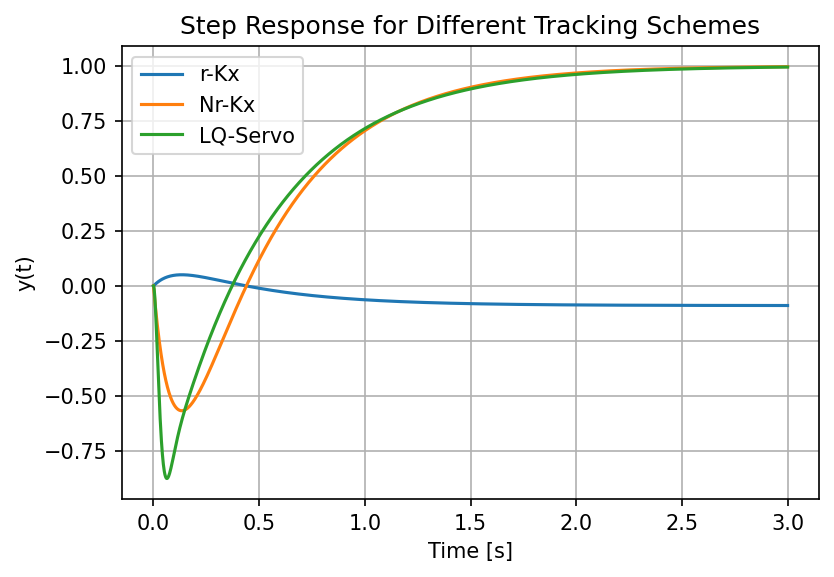

In [ ]:
# System model
A = np.array([[1,1],[1,2]])
B = np.array([[1],[0]])
C = np.array([[1,0]])
t = np.linspace(0,3,2000)
x0 = np.array([[0,0]])
x0i = np.array([[0,0,0]])

# LQR gains
Rxx = np.eye(2)
Ruu = 0.01

# Solve CARE
P = scipy.linalg.solve_continuous_are(A,B,Rxx,Ruu)

# Compute LQR gain
F = np.linalg.inv(np.atleast_2d(Ruu)) @ B.T @ P
print("LQR gain for first two tracking schemes")
display(Math(rf'F={latex(Matrix(np.round(F,4)))}'))
print("\n\n\n")



# Closed-loop step response for u = r - Fx
Gcl = scipy.signal.StateSpace(A-B@F, B, C)
t, y1 = scipy.signal.step(Gcl,x0,t)

# Closed-loop step response for u = Nr - Fx
with warnings.catch_warnings():
  warnings.simplefilter('ignore')
  tf = Gcl.to_tf()
N = np.atleast_2d([tf.den[2] / tf.num[1]])
print("Gain N for second tracking scheme")
display(Math(rf'N={np.round(N[0,0],4)}'))
print("\n\n\n")
Gcl = scipy.signal.StateSpace(A-B@F, B@N, C)
t, y2 = scipy.signal.step(Gcl,x0,t)



# LQ-servoing
Atilde = np.block([[A, np.zeros((2,1))],[-C, 0]])
Btilde = np.block([[B],[0]])
Br = np.block([[np.zeros_like(B)],[1]])
Ctilde = np.block([[C, 0]])
Rii = 1e5
Rxxtilde = scipy.linalg.block_diag(Rxx, Rii)

# Solve CARE
Ptilde = scipy.linalg.solve_continuous_are(Atilde,Btilde,Rxxtilde,Ruu)

# Compute LQR gain
Ftilde = np.linalg.inv(np.atleast_2d(Ruu)) @ Btilde.T @ Ptilde
print("Gain for LQ-servo")
display(Math(rf'\tilde{{F}}={latex(Matrix(np.round(Ftilde,4)))}'))
print("\n\n\n")

# Closed-loop step response for LQ-servo
Gcl = scipy.signal.StateSpace(Atilde-Btilde@Ftilde, Br, Ctilde)
t, y3 = scipy.signal.step(Gcl,x0i,t)



# Response plots
fig, ax = plt.subplots()
ax.plot(t,y1,t,y2,t,y3)
ax.grid()
ax.set_xlabel('Time [s]')
ax.set_ylabel('y(t)')
ax.set_title('Step Response for Different Tracking Schemes')
ax.legend(['r-Kx', 'Nr-Kx', 'LQ-Servo']);

$
\renewcommand{\jmatc}[4]{\left[ \ba{cc} #1 & #2 \\[.5em] #3 & #4 \ea
\right]}
\newcommand{\jmatr}[4]{\left[ \ba{rr} #1 & #2 \\[.5em] #3 & #4 \ea
\right]}
\newcommand{\jmthr}[9]{\left[ \ba{rrr} #1 & #2 & #3 \\
#4 & #5 & #6 \\ #7 & #8 & #9\ea \right]}
\newcommand{\jvthr}[3]{\left[ \ba{r} #1 \\ #2 \\ #3\ea \right]}
\newcommand{\jhthr}[3]{\left[ \ba{rrr} #1 & #2 & #3\ea \right]}
\newcommand{\jvechc}[2]{\left[ \ba{cc} #1 & #2 \ea \right]}
\newcommand{\jcolc}[2]{\left[ \ba{c} #1 \\ #2 \ea \right]}
\newcommand{\jvecvc}[2]{\left[ \ba{c} #1 \\ #2 \ea \right]}
\newcommand{\bmat}{\begin{bmatrix}}
\newcommand{\emat}{\end{bmatrix}}
\newcommand{\expect}[1]{\expec\left[ #1 \right]}
\newcommand{\mb}{\mathbf}
\newcommand{\argmax}{\operatornamewithlimits{argmax}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\ba}{\begin{array}}
\newcommand{\ea}{\end{array}}
\newcommand{\njbv}{\mathbf{v}}
\newcommand{\njbw}{\mathbf{w}}
\newcommand{\njbx}{\mathbf{x}}
\newcommand{\njby}{\mathbf{y}}
$

## Solution 3 <font color='red' size=3>[10 points total]</font>

The transfer function for the plant is given by
$$
G(s)=\frac{-s+3}{(-s+4)(s+3)}=\frac{s-3}{s^{2}-s-12}
$$
To convert this transfer function to state space we have that
$$
G(s)=\frac{Y(s)}{U(s)}=\frac{Y(s)}{X(s)} \frac{X(s)}{U(s)}=\frac{s-3}{s^{2}-s-12}
$$
and one option is to separate the system into
$$
\frac{Y(s)}{X(s)}=s-3 \Rightarrow Y(s)=s X(s)-3 X(s) \Rightarrow y=\dot{x}-3 x
$$
and
$$
\frac{X(s)}{U(s)}=\frac{1}{s^{2}-s-12} \Rightarrow s^{2} X(s)-s X(s)-12 X(s)=U(s) \Rightarrow \ddot{x}-\dot{x}-12 x=u
$$

Using $x_{1}=x$ and $x_{2}=\dot{x}$ gives,
$$
\begin{aligned}
\dot{x}_{1} &=x_{2} \\
\dot{x}_{2} &=x_{2}+12 x_{1}+u \\
y &=x_{2}-3 x_{1}
\end{aligned}
$$
Writing these equations in state space form gives
$$
\begin{aligned}
{\left[\begin{array}{l}
\dot{x}_{1} \\
\dot{x}_{2}
\end{array}\right] } &=\left[\begin{array}{cc}
0 & 1 \\
12 & 1
\end{array}\right]\left[\begin{array}{l}
x_{1} \\
x_{2}
\end{array}\right]+\left[\begin{array}{l}
0 \\
1
\end{array}\right] u+\left[\begin{array}{l}
0 \\
1
\end{array}\right] w \\
y &=\left[\begin{array}{ll}
-3 & 1
\end{array}\right]\left[\begin{array}{l}
x_{1} \\
x_{2}
\end{array}\right]+v
\end{aligned}
$$

1. As stated in slide 21-13,
$$
\bar{J}=\operatorname{Tr}\left\{P_{s s} L_{s s} R_{v v} L_{s s}^{T}+Q_{s s} R_{x x}\right\}=\operatorname{Tr}\left\{P_{s s} B_{w} R_{w w} B_{w}^{T}+Q_{s s} K_{s s}^{T} R_{u u} K_{s s}\right\}
$$
which shows that there is a tradeoff between the estimation and regulation errors. As a rule of thumb, $R_{x x}, R_{u u}, R_{w w}$, and $R_{v v}$ should be chosen so that the performance contributions due to the estimation and regulation errors are comparable. For this problem the following values provide similar contributions for $\operatorname{Tr}\left\{P_{s s} L_{s s} R_{v v} L_{s s}^{T}\right\}$ and $\operatorname{Tr}\left\{Q_{s s} R_{x x}\right\}$,
$$
\begin{aligned}
R_{x x} &=\left[\begin{array}{ll}
5 & 0 \\
0 & 5
\end{array}\right] \\
R_{u u} &=0.005 \\
R_{w w} &=1 \\
R_{v v} &=.1
\end{aligned}
$$

2. For these choices of the weighting matrices and the state space system defined above,
$$
\begin{aligned}
A_{c} &=A-B_{u} K-L C_{y}=\left[\begin{array}{cc}
27.2971 & -8.0990 \\
75.3652 & -69.4513
\end{array}\right] \\
B_{c} &=L=\left[\begin{array}{c}
9.0990 \\
36.3961
\end{array}\right] \\
C_{c} &=K=\left[\begin{array}{ll}
45.8231 & 34.0552
\end{array}\right]
\end{aligned}
$$
The compensator transfer function is given by $G(s)=C_{c}\left(s I-A_{c}\right)^{-1} B_{c}$. For this compensator the poles are at $s=-62.6665$ and $s=20.5123$ and the zero is at $s=-3$.

3. As seen in Figure 1 the compensator pulls the unstable poles into the left half plane. The design looks much like a classical lead compensator which is what we would expect for this kind of unstable plant. Using LQG instead of designing a lead controller by hand facilitates the compensator design process, and by appropriately choosing $R_{x x}, R_{u u}, R_{w w}$, and $R_{v v}$ we can effectively place the closed loop poles anywhere in the left half plane (assuming full controllability and observability). For this plant and compensator, the closed loop poles of the system are at $s=-31.9982, s=-5.0990, s=-3.0000$, and $s=-1.0570$ and thus the closed loop system is stable (as expected).


<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=1k-9ygi1jv3T6vIeuqabnC3w-oaDTIY94" alt="problem description" width="25%" />
</div>



| <font color='red'>Grading Issue</font>                | <font color='red'>Point Deduction</font> |
|-------------------------------------------------------|------------------------------------------|
| missing/incorrect discussion on the weighting matrices              | -2                                       |
| missing/incorrect compensator matrices (note that your result may change depending on the weighting matrices chosen) | -2      |
| missing/incorrect compensator poles and zeros (note that your result may change depending on the weighting matrices chosen) | -2      |
| missing/incorrect classical interpretration of your state-space controller            | -2                                       |

## Solution 4 <font color='red' size=3>[10 points total]</font>

System 1
The optimal gain is


<IPython.core.display.Math object>

The steady-state Riccati matrix is


<IPython.core.display.Math object>

The closed-loop eigenvalues are


<IPython.core.display.Math object>



System 2
The optimal gain is


<IPython.core.display.Math object>

The steady-state Riccati matrix is


<IPython.core.display.Math object>

The closed-loop eigenvalues are


<IPython.core.display.Math object>

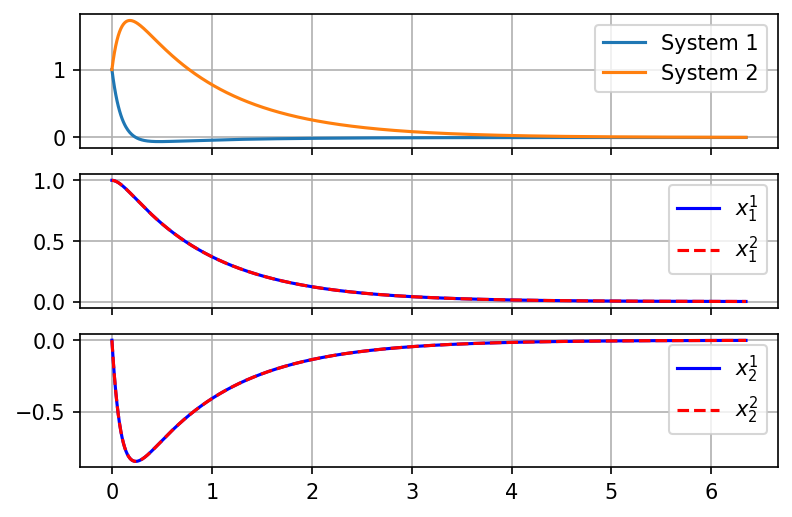

In [ ]:
# LQR gains
Rzz = 1
Ruu = ρ = 0.01

#
# System 1 Model
#

A = np.array([[0,1],[-6,-5]])
B = np.array([[0],[1]])
Cz = np.array([[1,1]])

# Solve CARE
Rxx = Cz.T @ np.atleast_2d(Rzz) @ Cz
P = scipy.linalg.solve_continuous_are(A,B,Rxx,Ruu)

# Compute LQR gain
F = np.linalg.inv(np.atleast_2d(Ruu)) @ B.T @ P

# Closed-loop poles
Acl = A - B @ F
λ, _ = np.linalg.eig(Acl)

# Closed-loop response
x0 = np.array([[1],[0]])
#Gcl = scipy.signal.StateSpace(Acl, np.zeros_like(B), Cz)
Gcl = scipy.signal.StateSpace(Acl, np.zeros_like(B), np.vstack((Cz,np.eye(2))))
t, z1 = scipy.signal.impulse(Gcl,x0,N=1000)

# Output
print("System 1")
print("The optimal gain is")
display(Math(rf'F={latex(Matrix(np.round(F,4)))}'))
print("The steady-state Riccati matrix is")
display(Math(rf'P={latex(Matrix(np.round(P,4)))}'))
print("The closed-loop eigenvalues are")
display(Math(rf'λ={np.round(λ[0],4)},{np.round(λ[1],4)}'))

#
# System 2 Model
#

A = np.array([[0,1],[-6,-5]])
B = np.array([[0],[1]])
Cz = np.array([[1,-1]])

# Solve CARE
Rxx = Cz.T @ np.atleast_2d(Rzz) @ Cz
P = scipy.linalg.solve_continuous_are(A,B,Rxx,Ruu)

# Compute LQR gain
F = np.linalg.inv(np.atleast_2d(Ruu)) @ B.T @ P

# Closed-loop poles
Acl = A - B @ F
λ, _ = np.linalg.eig(Acl)

# Closed-loop response
x0 = np.array([[1],[0]])
#Gcl = scipy.signal.StateSpace(Acl, np.zeros_like(B), Cz)
Gcl = scipy.signal.StateSpace(Acl, np.zeros_like(B), np.vstack((Cz,np.eye(2))))
t, z2 = scipy.signal.impulse(Gcl,x0,N=1000)

# Output
print("\n\nSystem 2")
print("The optimal gain is")
display(Math(rf'F={latex(Matrix(np.round(F,4)))}'))
print("The steady-state Riccati matrix is")
display(Math(rf'P={latex(Matrix(np.round(P,4)))}'))
print("The closed-loop eigenvalues are")
display(Math(rf'λ={np.round(λ[0],4)},{np.round(λ[1],4)}'))

# Response plots
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(t,z1[:,0],t,z2[:,0])
ax1.grid()
ax1.legend(['System 1', 'System 2']);
ax2.plot(t,z1[:,1],'b')
ax2.plot(t,z2[:,1],'r--')
ax2.grid()
ax2.legend(['$x_1^1$', '$x_1^2$']);
ax3.plot(t,z1[:,2],'b')
ax3.plot(t,z2[:,2],'r--')
ax3.grid()
ax3.legend(['$x_2^1$', '$x_2^2$']);

The reason the gains for the two systems are the same but the responses differ can be understood in terms of the symmetric root locus (SRL).

System 1 has the transfer function from $u$ to $z$ as
$$
G_{zu}^1(s) = \frac{s+1}{(s+2)(s+3)}
$$
whereas the transfer function for System 2 is
$$
G_{zu}^2(s) = \frac{-s+1}{(s+2)(s+3)}
$$

Then
$$
\Delta(s) = 1 + \frac{1}{\rho}G_{zu}(-s)G_{zu}(s) = 0
$$
gives SRL.

Both systems have the same SRL, therefore the closed-loop optimal poles will be the same. Therefore, gains will be the same because they have the same $A$ and $B$. However, performance is different because System 2 has a right-half plane zero (non-minimum phase). This is reflected in the initial "wrong way" behavior of the response of System 2 and in the much larger $P_{11}$ element of System 2. In fact, this larger $P_{11}$ indicates the cost-to-go is much larger for System 2 starting from the initial condition.

Note that even though $x(t)$ are the same in these two cases, the first system has a component of the response that has been designed to be less observable in the cost $z_1(t)$ - this would correspond to a near pole/zero cancellation in the SRL (zero at $-1$, closed-loop pole at $-1.1$). 

The second system on the otherhand has the same dynamic response (pole at $-1.1$), but the corresponding zero is at $s=1$ now - there is no near loss of observability and the entire state response can be seen.

This highlights the fact that the performance can be improved by both *speeding up the response*  (making the poles faster) and by making it unobservable in the performance variables. LQR is smart and does both! 

So you have to pick the performance objective well.

<br>

| <font color='red'>Grading Issue</font>                | <font color='red'>Point Deduction</font> |
|-------------------------------------------------------|------------------------------------------|
| missing/incorrect $F$, $P$, $\lambda$ for system 1              | -2                                       |
| missing/incorrect $F$, $P$, $\lambda$ for system 2              | -2                                       |
| missing/incorrect system response code/plots                    | -2                                       |
| missing/incorrect discussion about different performance in $z$ | -2                                       |

## Solution 5 <font color='red' size=3>[10 points total]</font>

1. The Hamiltonian for this system is given by $H=(u-t)^2+pu$. The necessary condition on $\dot{p}$ gives
$$
\dot{p}=-H_x^\top=0 \implies p = const.
$$
Therefore $p$ is constant for all time $0\le t\le2$.
<br><br>
2. Ignoring the control constraint we have,
$$
H_u = 0 \implies 2u-2t+p=0 \implies u=t-\frac{p}{2}.
$$
Integrating the dynamics gives
$$
\dot{x}=u \implies x(t) = \frac{t^2}{2}-\frac{p}{2}t + c_2.
$$
Applying the initial condition gives
$$
x(2)=2-p+\frac{1}{8}=1 \implies p=\frac{9}{8}.
$$
For this value of $p$, the control becomes $u(t)=t-\frac{9}{16}$ which violates the constraint $u(t)\le1$ for $\frac{25}{16}< t\le2$.
<br><br>
3. Now assume $u(t)=1$ for $0\leq t\leq2$. Integrating the dynamics gives
$$
\dot{x}=1 \implies x(t) = t + c.
$$
Applying the initial condition gives
$$
x(0) = c = \frac{1}{8}.
$$
At $t=2$, $x$ becomes
$$
x(2) = 2 + \frac{1}{8} \neq 1,
$$
which violates the boundary condition $x(2)=1$.
<br><br>
4. Since we start with the constraint being inactive, from part (b) we have that
$$
u(t)=t-\frac{p}{2} \implies p(t) = -2(u(t)-t).
$$
At the switch time $t_s$, the constraint on the control becomes active, so
$$
u(t_s) = 1 \implies p(t_s) = -2(1-t_s).
$$
Since $p$ is constant, then $p=-2(1-t_s)$ has only one solution for $t_s$.
<br><br>
5. For $0\leq t\leq t_s$ we have $u=t-\frac{p}{2}$ so the dynamics become
$$
\dot{x}=u \implies x(t)=\frac{t^2}{2} - \frac{p}{2}t + c_2.
$$
Applying the initial condition gives
$$
x(0) = c_2 = \frac{1}{8} \implies x(t) = \frac{t^2}{2} - \frac{p}{2}t + \frac{1}{8}
$$
At $t_s$ we have that
$$
\begin{align}
x(t_s)
&= \frac{t_s^2}{2} - \frac{p}{2}t_s + \frac{1}{8} \\
&= \frac{t_s^2}{2} - \frac{-2(1-t_s)}{2}t_s + \frac{1}{8} \\
&= \frac{-t_s^2}{2} + t_s + \frac{1}{8}
\end{align}
$$
From $t_s\leq t \leq2$ we have that $u=1$ so the dynamics become
$$
\dot{x}=1 \implies x(t) = t + c
$$
Applying the boundary condition $x(2)=1$ gives 
$$
x(2)=2+c=1 \implies c = -1 \implies x(t) = t - 1.
$$
By continuity of $x$ at $t_s$ we have that
$$
\begin{align}
\frac{-t_s^2}{2} + t_s + \frac{1}{8} &= t_s - 1 \\
\frac{-t_s^2}{2} + \frac{1}{8} &= - 1 \\
\frac{-t_s^2}{2} &= \frac{9}{8} \\
t_s &= \frac{3}{2} \\
\end{align}
$$
Finally, $x(t_s)=\frac{3}{2}-1=\frac{1}{2}$.

<br>

| <font color='red'>Grading Issue</font>                                   | <font color='red'>Point Deduction</font> |
|--------------------------------------------------------------------------|------------------------------------------|
| did not use necessary condition on costate dynamics to show $p$ constant | -2                                       |
| incorrect control for part 2 (should violate constraints)                | -2                                       |
| incorrect state integration (should violate boundary condition)          | -2                                       |
| did not show corner time relation to costate as desired                  | -2                                       |
| did not show that $t_s=3/2$                                              | -1                                       |
| did not calculate $x(t_s)$                                               | -1                                       |